In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Build a ML productionized model where it takes: Title, Location, Duration(Months), Skills u have, perks u need to give a Monthly Stipend estimate.

In [525]:
df = pd.read_excel("internshala_scraped_raw.xls")
df.head(3)

,Title,Company,Location,Duration,Stipend,Apply By,Applicants,Skills Required,Perks,Number of Openings,Link
0,Fundraising,Tare Zameen Foundation,Work From Home,1 Month,1000 /month + Incentives,18 Feb' 22,390 applicants,NaN,"Certificate , Letter of recommendation , Flexi...",200.0,https://internshala.com/internship/detail/fund...
1,Business Development,Internshala,Gurgaon,6 Months,20000 /month,22 Feb' 22,346 applicants,"MS-Office ,","Certificate , Informal dress code , 5 days a w...",2.0,https://internshala.com/internship/detail/busi...
2,Campus Ambassador,International Model United Nations,Work From Home,1 Month,Performance Based,2 Mar' 22,654 applicants,NaN,"Certificate , Letter of recommendation , Flexi...",3000.0,https://internshala.com/internship/detail/camp...


### Fix stipend:

In [526]:
#added incentives column (1 if incentives or performance based in stipend)
df["Incentives"] = df["Stipend"].apply(lambda x: 1 if "Incentives" in x or "Performance Based" in x else 0)

In [527]:
#removed incentives from stipend
df["Stipend"] = df["Stipend"].str.replace("  Incentives", "")

In [528]:
#removed performance based and replaced with 0
df["Stipend"] = df["Stipend"].str.replace("Performance Based", "0")

In [529]:
#replaced unpaid with 0
df["Stipend"] = df["Stipend"].str.replace("Unpaid", "0")

In [530]:
#replaced not provided with 0
df["Stipend"] = df["Stipend"].str.replace("Not provided", "0")

In [531]:
#added separate column for lumpsum amount to do calculations of per month
df["Lumpsum"] = df["Stipend"].apply(lambda x: x.split("lump sum")[0] if "lump sum" in x else 0)

In [532]:
#removed word lump sum from stipend
df["Stipend"] = df["Stipend"].str.replace("lump sum", "")

In [533]:
#added separate column for weekly amount to do calculation of per month
df["Weekly"] = df["Stipend"].apply(lambda x: x.split("/week")[0] if "/week" in x else 0)

In [534]:
#removed word week from stipend
df["Stipend"] = df["Stipend"].str.replace("/week","")

In [535]:
#added separate column for per design amount to do calculation of per month
df["Design"] = df["Stipend"].apply(lambda x: x.split("/Design")[0] if "/Design" in x else 0)

In [536]:
#removed the word design from stipend
df["Stipend"] = df["Stipend"].str.replace("/Design", "")

In [537]:
#removed the word month from stipend
df["Stipend"] = df["Stipend"].str.replace("/month", "")

In [538]:
#removed the symbol "+" from stipend
df["Stipend"] = df["Stipend"].str.replace("+", "")

C:\Users\rishi\AppData\Local\Temp\ipykernel_18880\3249886218.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stipend"] = df["Stipend"].str.replace("+", "")


In [539]:
#striped blank spaces from stipend to do calculations w/o exceptions
df["Stipend"] = df["Stipend"].str.strip()

In [540]:
#averaged the stipend for range values
df["Stipend"] = df["Stipend"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if "-" in x else x)

In [541]:
#replaced not provided duration to 0 (will take the average going ahead)
df["Duration"] = df["Duration"].str.replace("Not Provided","0")

In [542]:
#made duration monthly column to store conversions in month for further calculations
df["Duration in Month"] = df["Duration"].apply(lambda x: x.split(" ")[0] if "Month" in x else float(x.split(" ")[0].strip()) / 4.345)

In [543]:
#averaged ranged lumpsum values
df["Lumpsum"] = df["Lumpsum"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if "-" in str(x) else x)

In [544]:
#converted to float for ease in calculations
df["Duration in Month"] = df["Duration in Month"].astype("float")
df["Lumpsum"] = df["Lumpsum"].astype("float")

In [545]:
#divided lumpsum by monthly duration to get montly amount
df["Lumpsum to monthly"] = (df["Lumpsum"]) / (df["Duration in Month"])


In [546]:
#averaged ranged weekly values
df["Weekly"] = df["Weekly"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if "-" in str(x) else x)

In [547]:
#converted to float for ease in further calculations
df["Weekly"] = df["Weekly"].astype("float")

In [548]:
#converted weekly amount to monthly
df["Weekly to monthly"] = df["Weekly"] * 4.345

In [549]:
#converted design amount to monthly
df["Design to monthly"] = df["Design"].apply(lambda x: int(x) * 30 if x != 0 else 0)

In [550]:
#converted stipend to float for ease in calculations
df["Stipend"] = df["Stipend"].astype("float")

In [551]:
#pipeline calc converting stipend to final
df["Stipend monthly"] = df.apply(lambda x: x["Stipend"] if x["Lumpsum to monthly"] == 0 else x["Lumpsum to monthly"], axis=1)

In [552]:
#pipeline calc converting stipend to final
df["Stipend monthly2"] = df.apply(lambda x: x["Stipend monthly"] if x["Weekly to monthly"] == 0 else x["Weekly to monthly"], axis=1)

In [553]:
#pipeline calc converting stipend to final
df["Stipend monthly final"] = df.apply(lambda x: x["Stipend monthly2"] if x["Design to monthly"] == 0 else x["Design to monthly"], axis=1)

In [554]:
#storing stipend monthly final calculated back to stipend
df["Stipend"] = df["Stipend monthly final"]

In [555]:
#dropping all unneccesary columns made above
df.drop(['Duration', 'Lumpsum to monthly', 'Weekly to monthly', 'Design to monthly', 'Stipend monthly', 'Stipend monthly2', 'Stipend monthly final', 'Lumpsum', 'Weekly', 'Design', 'Number of Openings', 'Link', 'Apply By', 'Applicants'], axis=1, inplace=True)

### Fix skills reqd.:

In [558]:
#checking for null values
df.isnull().sum()

Title                   0
Company                 0
Location                0
Stipend                 2
Skills Required      3482
Perks                 913
Incentives              0
Duration in Month       0
dtype: int64

In [559]:
#filled null values in skills required
df["Skills Required"].fillna("Not Specific , ", axis=0, inplace=True)

In [560]:
#created list with all specific skills required for each row
df["Skills Required"] = df["Skills Required"].apply(lambda x: x.split(" , ")[:-1])

In [561]:
#got the unique names with for loop of all unique skills for further calculations
m_list = []
for i in df["Skills Required"]:
    m_list += i
skill_name_list = []
for i in m_list:
    if i not in skill_name_list:
        skill_name_list.append(i)
    else:
        skill_name_list = skill_name_list
print(skill_name_list)

['Not Specific', 'MS-Office', 'Creative Writing', 'Event Management', 'Report Writing', 'Social Media Marketing', 'Adobe After Effects', 'Adobe Photoshop', 'Adobe Premiere Pro', 'English Proficiency (Spoken)', 'MS-Excel', 'English Proficiency (Written)', 'Product Lifecycle Management(PLM)', 'Product Management', 'MS-Word', 'Adobe Creative Suite', 'Adobe Photoshop Lightroom CC', 'Copywriting', 'Video Editing', 'Digital Marketing', 'Email Marketing', 'Facebook Marketing', 'Instagram Marketing', 'Search Engine Marketing (SEM)', 'Search Engine Optimization (SEO)', 'C++ Programming', 'C Programming', 'Data Structures', 'Python', 'MS-PowerPoint', 'Photography', 'Hindi Proficiency (Spoken)', 'Hindi Proficiency (Written)', 'Deep Learning', 'Image Processing', 'Machine Learning', 'OpenCV', 'Gujarati Proficiency (Spoken)', 'Gujarati Proficiency (Written)', 'Client Interaction', 'Client Relationship', 'Telugu Proficiency (Spoken)', 'Acting Audition', 'Acting technique', 'Fashion Designing', 'Fash

In [562]:
#created dummy columns of specific skills for ML modelling coming ahead
for i in skill_name_list:
    df[i] = i
    for j in range(0,15119):
        if df[i][j] in df["Skills Required"][j]:
            df[i][j] = 1
        else:
            df[i][j] = 0

C:\Users\rishi\AppData\Local\Temp\ipykernel_18880\1946250305.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = 1
C:\Users\rishi\AppData\Local\Temp\ipykernel_18880\1946250305.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = 0
C:\Users\rishi\AppData\Local\Temp\ipykernel_18880\1946250305.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = i


In [564]:
#saved the dataset to roll back from here if need
df.to_excel("halfway_after_forloop.xlsx", index=False)

In [1]:
#imported again as we start from here again after a roll back
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("halfway_after_forloop.xlsx")

In [41]:
#saved a copy to df1 to reduce loading and processing times
df1 = df.copy()

In [43]:
#dropped unneeded columns
df1.drop(["Not Specific", "Skills Required"], axis=1, inplace=True)

### Fixing Perks:

In [44]:
#filled null values in perks
df1["Perks"].fillna("Not Specific , ", axis=0, inplace=True)

In [45]:
#created list with all specific perk for each row
df1["Perks"] = df1["Perks"].apply(lambda x: x.split(" , ")[:-1])

In [46]:
#got the unique names with for loop of all unique perks for further calculations
m_list = []
for i in df1["Perks"]:
    m_list += i
perk_name_list = []
for i in m_list:
    if i not in perk_name_list:
        perk_name_list.append(i)
    else:
        perk_name_list = perk_name_list
print(perk_name_list)

['Certificate', 'Letter of recommendation', 'Flexible work hours', 'Informal dress code', '5 days a week', 'Job offer', 'Not Specific', 'Free snacks & beverages']


In [47]:
#created dummy columns of specific perks for ML modelling coming ahead
for i in perk_name_list:
    df1[i] = i
    for j in range(0,15119):
        if df1[i][j] in df1["Perks"][j]:
            df1[i][j] = 1
        else:
            df1[i][j] = 0

In [48]:
#dropped unneeded columns
df1.drop(["Perks", "Not Specific"], axis=1, inplace=True)

In [49]:
#two rows with incomplete info accross all columns so will drop them
df1[df1["Duration in Month"] == 0]

,Title,Company,Location,Stipend,Incentives,Duration in Month,MS-Office,Creative Writing,Event Management,Report Writing,...,InterPlanetary File System,SharePoint,COMSOL,Certificate,Letter of recommendation,Flexible work hours,Informal dress code,5 days a week,Job offer,Free snacks & beverages
15112,Cost Accounting,Oil & Natural Gas Corporation Limited,Agartala,NaN,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15114,Volunteering,Centre For Science And Environment (CSE),Delhi,NaN,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#dropped the 2 rows
df1.drop([15112, 15114], axis=0, inplace=True)

In [51]:
#removed outliers that can affect our ML models and also to normalise our target variable distribution as much as possible
df1 = df1[(df1["Stipend"] <=df1["Stipend"].quantile(0.9)) & (df1["Stipend"] >=df1["Stipend"].quantile(0.1))]

### Basic EDA to get an overview: 

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* Top most hiring companies:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Relinns Technologies'),
  Text(1, 0, 'Webtechage Private Limited'),
  Text(2, 0, 'Stirring Minds'),
  Text(3, 0, 'Reach Technologies'),
  Text(4, 0, 'Multibhashi'),
  Text(5, 0, 'MyMegaminds'),
  Text(6, 0, 'OneService India'),
  Text(7, 0, 'AstroTalk'),
  Text(8, 0, 'Medicana'),
  Text(9, 0, 'DeepThought Edutech Ventures Private Limited')])

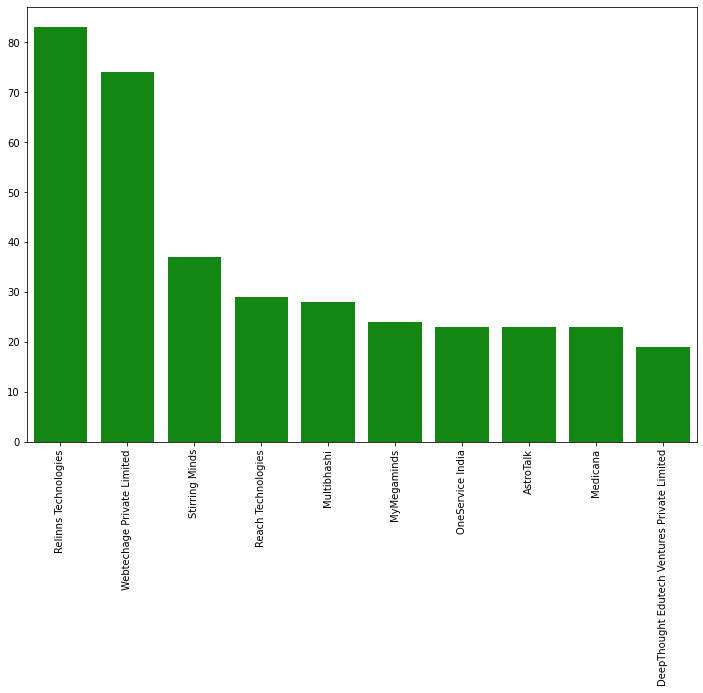

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x=df1["Company"].value_counts()[0:10].index, y=df1["Company"].value_counts()[0:10].values, color="#009900")
plt.xticks(rotation=90)

* Top locations other than WFH:

<AxesSubplot:>

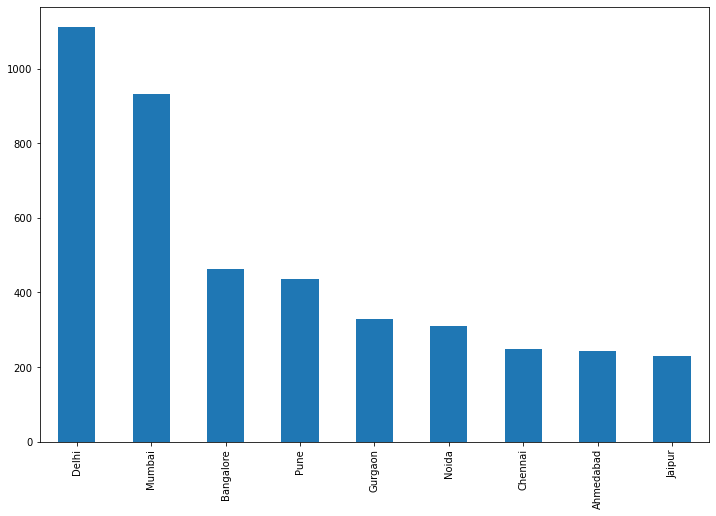

In [18]:
plt.figure(figsize=(12,8))
df1["Location"].value_counts()[1:10].plot(kind="bar")

* Top titles:

<AxesSubplot:>

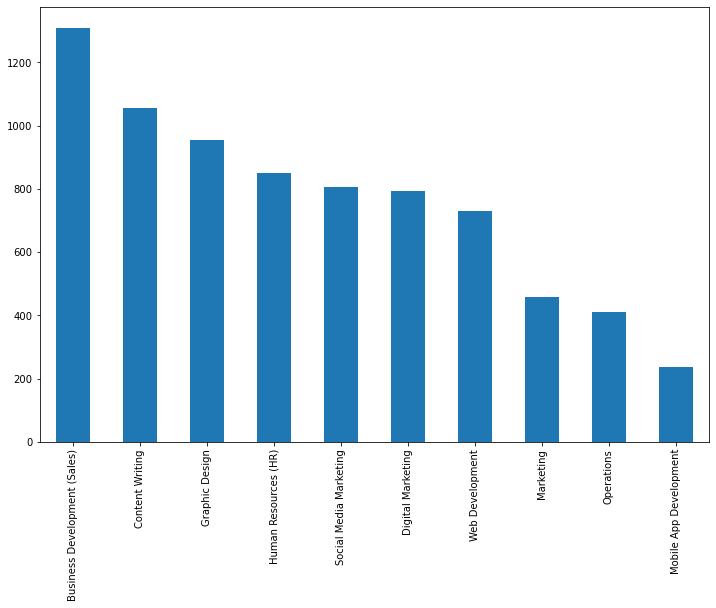

In [19]:
plt.figure(figsize=(12,8))
df1["Title"].value_counts()[0:10].plot(kind="bar")

### Checking the distribution of our target variable after removing outliers to make the ML model predictive enough:

<AxesSubplot:>

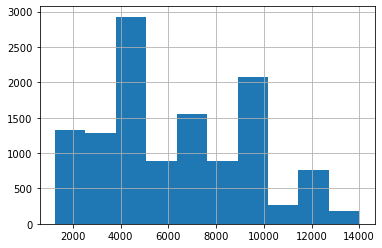

In [20]:
df1["Stipend"].hist()

* Roughly a normal distribution,.. slightly skewed to the right but ok
* IMP :The rough distribution also signifies that our model will have higher error range but still will work enough to give a rough estimate to users.

## Model testing and building:

In [13]:
#created dummy columns for our leftover categorical variables
df_dum = pd.get_dummies(df1[["Title", "Location"]], drop_first=True)

In [14]:
#dropped the categorical variables
df1.drop(["Title", "Location", "Company"], axis=1, inplace=True)

In [15]:
#concatenated the categorical dummies with main dataframe
df_full = pd.concat([df1, df_dum], axis=1)

In [16]:
#defined the training data and target for our ML process
X = df_full.drop(columns=["Stipend"])
y = df_full["Stipend"]

In [17]:
#imported the required ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor

In [18]:
#scaled the training data for optimal training as there were values in non uniform ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
#splitted the data into training set and test set to evaluate model performance and check for overfitting issues if arises
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

## Testing score of all vanilla models: 
* We will choose best vanilla model and hyperparameter tune that model for best possible performance

In [68]:
#vanilla Linear regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)
test_MAE = mean_absolute_error(y_test, lr_model.predict(X_test))
test_CV_score = cross_val_score(lr_model, X_test, y_test, scoring="neg_mean_absolute_error")
mean_CV_score = np.mean(test_CV_score)

print("Linear Model:")
print("Train Score --->", train_score)
print("Test Score --->", test_score)
print("Test Mean Absolute Error --->", test_MAE)
print("Test Cross Val Score --->", test_CV_score)
print("Test Mean Cross Val Score --->", mean_CV_score)

Linear Model:
Train Score ---> 0.22849793371989036
Test Score ---> -3.8057646724789855e+28
Test Mean Absolute Error ---> 1.6179588882352794e+17
Test Cross Val Score ---> [-1.33182853e+17 -1.10852868e+17 -9.83532593e+16 -1.81395064e+17
 -7.36405209e+16]
Test Mean Cross Val Score ---> -1.1948491304329634e+17


* poor performance by linear model as expected as our data is sparse
* we try lasso and ridge next which should perform better than linear due to regularisation

In [21]:
#vanilla Lasso regression Model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

train_score = lasso_model.score(X_train, y_train)
test_score = lasso_model.score(X_test, y_test)
test_MAE = mean_absolute_error(y_test, lasso_model.predict(X_test))
test_CV_score = cross_val_score(lasso_model, X_test, y_test, scoring="neg_mean_absolute_error")
mean_CV_score = np.mean(test_CV_score)

print("Lasso Model:")
print("Train Score --->", train_score)
print("Test Score --->", test_score)
print("Test Mean Absolute Error --->", test_MAE)
print("Test Cross Val Score --->", test_CV_score)
print("Test Mean Cross Val Score --->", mean_CV_score)

Lasso Model:
Train Score ---> 0.3787421115161418
Test Score ---> 0.10274316598149025
Test Mean Absolute Error ---> 2368.7077850425503
Test Cross Val Score ---> [-2719.9527822  -2484.03250341 -2658.47122585 -2655.96030514
 -2511.14485173]
Test Mean Cross Val Score ---> -2605.91233366662


* better than linear model as expected but still not satisfactory

In [70]:
#vanilla Ridge regression Model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

train_score = ridge_model.score(X_train, y_train)
test_score = ridge_model.score(X_test, y_test)
test_MAE = mean_absolute_error(y_test, ridge_model.predict(X_test))
test_CV_score = cross_val_score(ridge_model, X_test, y_test, scoring="neg_mean_absolute_error")
mean_CV_score = np.mean(test_CV_score)

print("Ridge Model:")
print("Train Score --->", train_score)
print("Test Score --->", test_score)
print("Test Mean Absolute Error --->", test_MAE)
print("Test Cross Val Score --->", test_CV_score)
print("Test Mean Cross Val Score --->", mean_CV_score)

Ridge Model:
Train Score ---> 0.3791111804191183
Test Score ---> 0.08444846208287116
Test Mean Absolute Error ---> 2388.924284275584
Test Cross Val Score ---> [-2793.36304379 -2518.06898667 -2691.23716559 -2660.85978635
 -2546.02026051]
Test Mean Cross Val Score ---> -2641.9098485794466


* better than linear model as expected but still not satisfactory

In [71]:
#vanilla Random forest regression Model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

train_score = rfr_model.score(X_train, y_train)
test_score = rfr_model.score(X_test, y_test)
test_MAE = mean_absolute_error(y_test, rfr_model.predict(X_test))
test_CV_score = cross_val_score(rfr_model, X_test, y_test, scoring="neg_mean_absolute_error")
mean_CV_score = np.mean(test_CV_score)

print("Random Forest Model:")
print("Train Score --->", train_score)
print("Test Score --->", test_score)
print("Test Mean Absolute Error --->", test_MAE)
print("Test Cross Val Score --->", test_CV_score)
print("Test Mean Cross Val Score --->", mean_CV_score)

Random Forest Model:
Train Score ---> 0.8571583723385677
Test Score ---> 0.16837249862840198
Test Mean Absolute Error ---> 2259.085143929908
Test Cross Val Score ---> [-2414.635457   -2299.820643   -2422.12633975 -2525.25026992
 -2330.15371834]
Test Mean Cross Val Score ---> -2398.397285605076


* here in random forest, the train score and test score looks interesting.. it indicates that the model overfitted the training data

In [72]:
#vanilla gradient boosting Model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

train_score = gbr_model.score(X_train, y_train)
test_score = gbr_model.score(X_test, y_test)
test_MAE = mean_absolute_error(y_test, gbr_model.predict(X_test))
test_CV_score = cross_val_score(gbr_model, X_test, y_test, scoring="neg_mean_absolute_error")
mean_CV_score = np.mean(test_CV_score)

print("Gradient Boosting Model:")
print("Train Score --->", train_score)
print("Test Score --->", test_score)
print("Test Mean Absolute Error --->", test_MAE)
print("Test Cross Val Score --->", test_CV_score)
print("Test Mean Cross Val Score --->", mean_CV_score)

Gradient Boosting Model:
Train Score ---> 0.20995494934398484
Test Score ---> 0.19002180868569163
Test Mean Absolute Error ---> 2325.108860050951
Test Cross Val Score ---> [-2375.65293893 -2277.75063134 -2399.32064277 -2430.45528113
 -2266.14386256]
Test Mean Cross Val Score ---> -2349.8646713447242


* gbr model looks ok in all aspects but we will see if we can find something better

In [73]:
#vanilla SVR Model
svr_model = SVR()
svr_model.fit(X_train, y_train)

train_score = svr_model.score(X_train, y_train)
test_score = svr_model.score(X_test, y_test)
test_MAE = mean_absolute_error(y_test, svr_model.predict(X_test))
test_CV_score = cross_val_score(svr_model, X_test, y_test, scoring="neg_mean_absolute_error")
mean_CV_score = np.mean(test_CV_score)

print("SVR Model:")
print("Train Score --->", train_score)
print("Test Score --->", test_score)
print("Test Mean Absolute Error --->", test_MAE)
print("Test Cross Val Score --->", test_CV_score)
print("Test Mean Cross Val Score --->", mean_CV_score)

SVR Model:
Train Score ---> -0.024119321277743966
Test Score ---> -0.022255758343477927
Test Mean Absolute Error ---> 2626.2816370109786
Test Cross Val Score ---> [-2637.50193359 -2643.67709341 -2641.08780607 -2731.38403854
 -2483.20732019]
Test Mean Cross Val Score ---> -2627.3716383592046


* svr model shows inadequate performance compared to others

In [74]:
#vanilla LGBM Model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

train_score = lgbm_model.score(X_train, y_train)
test_score = lgbm_model.score(X_test, y_test)
test_MAE = mean_absolute_error(y_test, lgbm_model.predict(X_test))
test_CV_score = cross_val_score(lgbm_model, X_test, y_test, scoring="neg_mean_absolute_error")
mean_CV_score = np.mean(test_CV_score)

print("LGBM Model:")
print("Train Score --->", train_score)
print("Test Score --->", test_score)
print("Test Mean Absolute Error --->", test_MAE)
print("Test Cross Val Score --->", test_CV_score)
print("Test Mean Cross Val Score --->", mean_CV_score)

LGBM Model:
Train Score ---> 0.32048298913717554
Test Score ---> 0.21122107660635747
Test Mean Absolute Error ---> 2263.272055858764
Test Cross Val Score ---> [-2387.48229987 -2305.87818122 -2374.67103939 -2475.53608827
 -2402.58120057]
Test Mean Cross Val Score ---> -2389.2297618626085


* lgbm model looks good in all aspects

In [75]:
#vanilla XGB Model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

train_score = xgb_model.score(X_train, y_train)
test_score = xgb_model.score(X_test, y_test)
test_MAE = mean_absolute_error(y_test, xgb_model.predict(X_test))
test_CV_score = cross_val_score(xgb_model, X_test, y_test, scoring="neg_mean_absolute_error")
mean_CV_score = np.mean(test_CV_score)

print("XGB Model:")
print("Train Score --->", train_score)
print("Test Score --->", test_score)
print("Test Mean Absolute Error --->", test_MAE)
print("Test Cross Val Score --->", test_CV_score)
print("Test Mean Cross Val Score --->", mean_CV_score)

XGB Model:
Train Score ---> 0.3632033940728313
Test Score ---> 0.20282306845864084
Test Mean Absolute Error ---> 2278.867870023664
Test Cross Val Score ---> [-2403.8417525  -2289.16403741 -2333.2684233  -2484.68119748
 -2273.43314121]
Test Mean Cross Val Score ---> -2356.8777103819425


* xgb model also looks good

## After comparison of all vanilla models, decided to go with LGBM model as its efficient on computation power and also showing good model performance and can be hypertuned further too.

### Hyperparameter tuning of LGBM model:

* Decided to go with randomised search cv as our CPU is not good enough to perform grid search in lesser time.

In [20]:
#set the parameters we want to search with randomised search cv for the best model performance
parameters= {
    "num_leaves": [15, 20, 25, 32, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125],
    "max_depth": [-1, 2, 3, 4, 5, 8, 10, 12, 15],
    "learning_rate": [0.005, 0.001, 0.0015, 0.01, 0.05, 0.1, 0.15, 0.25, 0.5],
    "max_bin": [255, 125, 355, 500, 700, 55],
    "num_iterations": [10, 50, 75, 100, 150, 200, 500, 1000, 1500],
    "path_smooth": [1,2,3,4,5,10,15,20,25]
}

In [21]:
#adjusted randomised search cv parameters
rclf = RandomizedSearchCV(estimator=LGBMRegressor(num_threads=4), param_distributions= parameters, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=True, random_state=100, error_score="raise")

In [22]:
#fitted train set into randomised search cv to evaluate best parameters
rclf.fit(X_train, y_train)
rclf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4


LGBMRegressor(learning_rate=0.01, max_bin=255, max_depth=8, num_iterations=1000,
              num_leaves=55, num_threads=4, path_smooth=2)

In [23]:
#modeled lgbm again with the tuned parameters
lgbm_model = rclf.best_estimator_
lgbm_model.fit(X_train, y_train)

train_score = lgbm_model.score(X_train, y_train)
test_score = lgbm_model.score(X_test, y_test)
test_MAE = mean_absolute_error(y_test, lgbm_model.predict(X_test))
test_CV_score = cross_val_score(lgbm_model, X_test, y_test, scoring="neg_mean_absolute_error")
mean_CV_score = np.mean(test_CV_score)

print("LGBM Model:")
print("Train Score --->", train_score)
print("Test Score --->", test_score)
print("Test Mean Absolute Error --->", test_MAE)
print("Test Cross Val Score --->", test_CV_score)
print("Test Mean Cross Val Score --->", mean_CV_score)

[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
LGBM Model:
Train Score ---> 0.2995866425201603
Test Score ---> 0.2100214552210764
Test Mean Absolute Error ---> 2276.6810832031697
Test Cross Val Score ---> [-2357.96070993 -2275.0144068  -2386.40781684 -2460.16963673
 -2337.84389727]
Test Mean Cross Val Score ---> -2363.4792935147716


## Not significant but our performance increased slightly. (Mean Absolute Error around Rs 2300.)

## Saving the model and scaler in pickle file:

In [24]:
import pickle

In [25]:
# saved the model and standard scaler to disk
pickle.dump(lgbm_model, open('internshala_lgbm_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl','wb'))

In [26]:
# saved the feature labels in pickle file for flask api
index_dict = dict(zip(X.columns,range(X.shape[1])))
pickle.dump(index_dict, open('index_dict.pkl', 'wb'))

### We conclude till here, next we proceed further towards productionising the model.